<a href="https://colab.research.google.com/github/ravellys/TemporalSeriesAnalyses/blob/main/ML_CO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Mineração dos Dados

In [ ]:
df = pd.read_excel('drive/My Drive/Classroom/Estudos Avançados 1 ACDA/Modelagem_CO2/data_caatinga.xlsx')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2b8165550>,
      dtype=object)

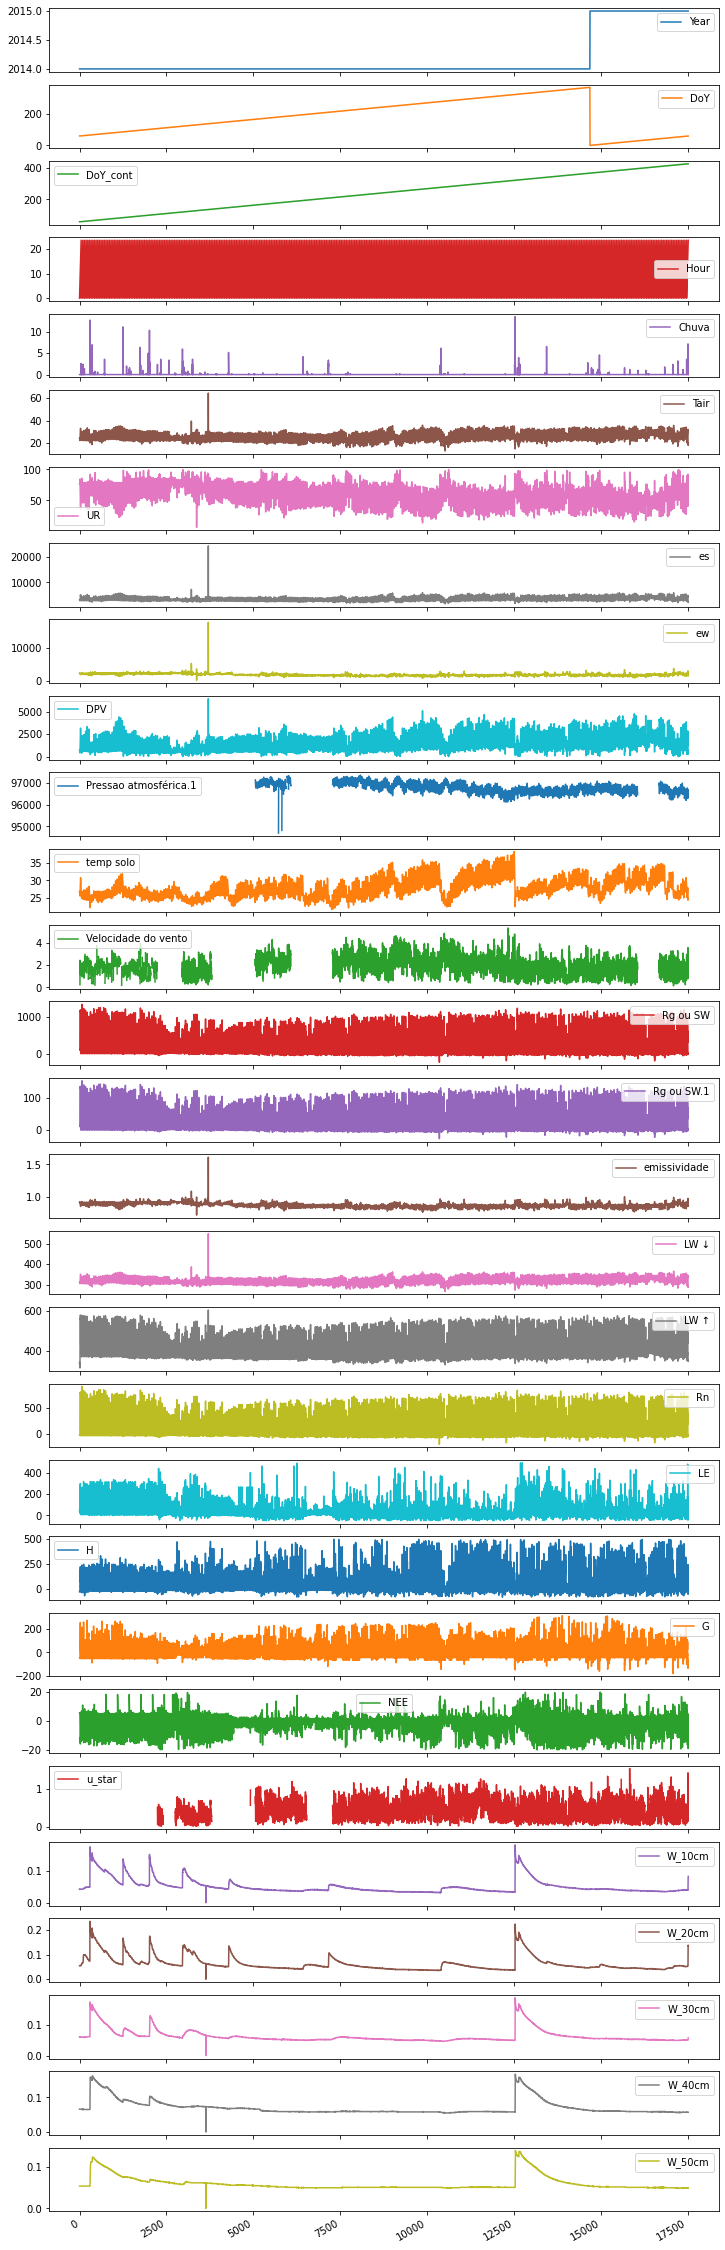

In [ ]:
df.plot(subplots=True, figsize=(12,45))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   17520 non-null  int64  
 1   DoY                    17520 non-null  int64  
 2   DoY_cont               17520 non-null  int64  
 3   Hour                   17520 non-null  float64
 4   date                   17520 non-null  object 
 5   Chuva                  17520 non-null  float64
 6   Tair                   17520 non-null  float64
 7   UR                     17520 non-null  float64
 8   es                     17520 non-null  float64
 9   ew                     17520 non-null  float64
 10  DPV                    17520 non-null  float64
 11  Pressao atmosférica    11254 non-null  object 
 12  Pressao atmosférica.1  10348 non-null  float64
 13  temp solo              17520 non-null  float64
 14  Velocidade do vento    12012 non-null  float64
 15  Rg

In [ ]:
df2 = df[["date","Chuva","temp solo","Tair","NEE", "UR","LE"]]
df2["SWC"] = df[["W_10cm","W_20cm","W_30cm","W_40cm","W_50cm"]].values.mean(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df2["date"] = pd.to_datetime(df.date)
df2['day'] = df2.date.apply(lambda x: str(x).split(" ")[0])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       17520 non-null  datetime64[ns]
 1   Chuva      17520 non-null  float64       
 2   temp solo  17520 non-null  float64       
 3   Tair       17520 non-null  float64       
 4   NEE        17520 non-null  float64       
 5   UR         17520 non-null  float64       
 6   LE         17520 non-null  float64       
 7   SWC        17520 non-null  float64       
 8   day        17520 non-null  object        
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 1.2+ MB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df2.head()

,date,Chuva,temp solo,Tair,NEE,UR,LE,SWC,day
0,2014-03-01 00:00:00,0.0,26.85,24.402,5.3151,76.928,44.965,0.0558,2014-03-01
1,2014-03-01 00:30:00,0.0,26.73,24.346,5.6048,77.190,49.853,0.0558,2014-03-01
2,2014-03-01 01:00:00,0.0,26.60,24.308,5.4923,77.340,50.569,0.0558,2014-03-01
3,2014-03-01 01:30:00,0.0,26.48,24.242,5.4998,77.708,52.302,0.0554,2014-03-01
4,2014-03-01 02:00:00,0.0,26.37,24.108,5.3186,78.168,47.413,0.0554,2014-03-01


In [ ]:
df3 = pd.pivot_table(df2, values=['Chuva', 'temp solo', 'Tair', 'NEE', "SWC","UR","LE"], index=['day'], 
                     aggfunc={'Chuva':np.sum,
                              'temp solo':np.mean,
                              'Tair':np.mean,
                              'NEE':np.mean,
                              "SWC":np.mean,
                              "UR":np.mean,
                              "LE":np.mean})

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2014-03-01 to 2015-02-28
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Chuva      365 non-null    float64
 1   LE         365 non-null    float64
 2   NEE        365 non-null    float64
 3   SWC        365 non-null    float64
 4   Tair       365 non-null    float64
 5   UR         365 non-null    float64
 6   temp solo  365 non-null    float64
dtypes: float64(7)
memory usage: 22.8+ KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2b74c7b38>,
      dtype=object)

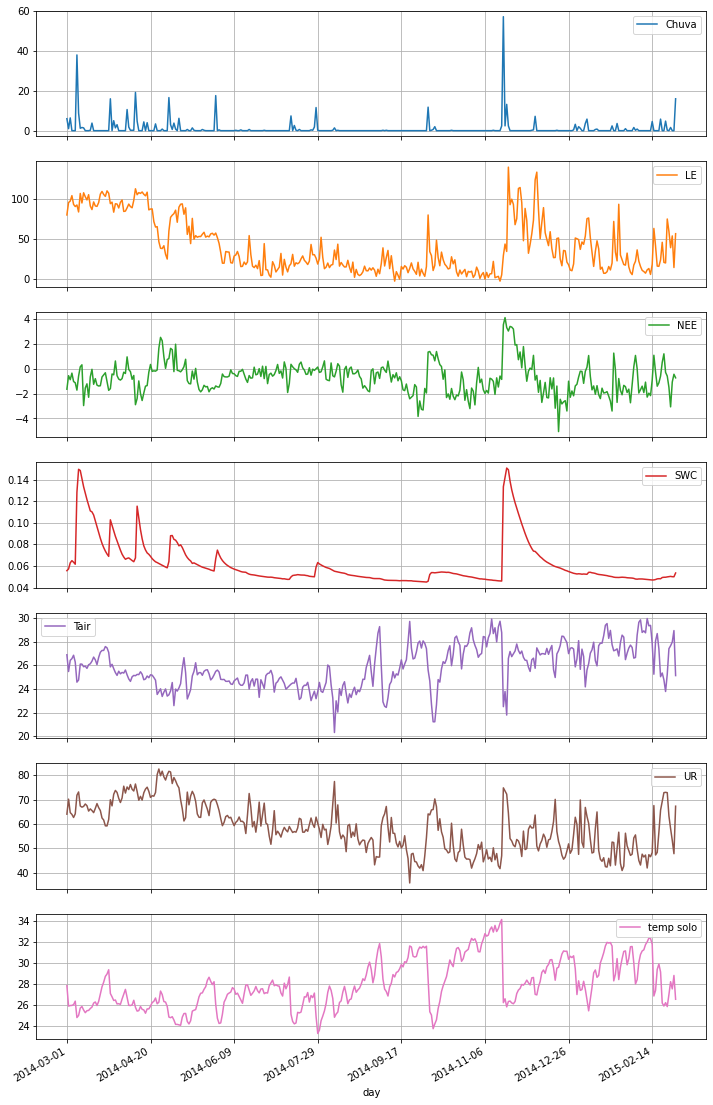

In [ ]:
df3.plot(subplots=True, grid = True, figsize = (12,21))

# RandomForest

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler(feature_range=(-1, 1))
#X = scaler.fit_transform(df3.drop(axis = 1, columns = 'NEE'))
#y = scaler.fit_transform(df3.NEE.values.reshape(-1,1))

X = df3.drop(axis = 1, columns = 'NEE')
y = df3.NEE.values.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split

SIZE_TRAIN = .8
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1-SIZE_TRAIN, random_state=None, shuffle=False)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
mdl = RandomForestRegressor(n_estimators=101, max_depth=29, criterion='mse', random_state=21)
mdl.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=29, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=101, n_jobs=None, oob_score=False,
                      random_state=21, verbose=0, warm_start=False)

In [ ]:
y_pred = mdl.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

R2 = r2_score(y_test, y_pred)
print(f'o coef. de determinação foi de {round(R2,2)}')

o coef. de determinação foi de 0.39


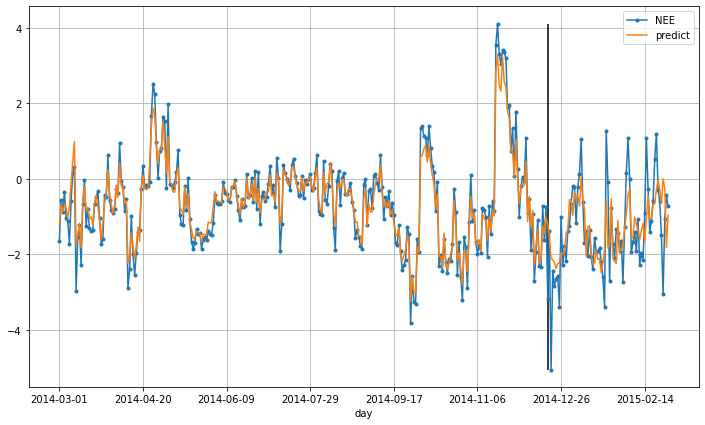

In [ ]:
df3['predict'] = mdl.predict(X)

fig, ax = plt.subplots(figsize=(12,7))
df3.plot(ax=ax, style='.-', y=['NEE'], figsize=(12,7), grid=True)
df3.plot(ax=ax, y=['predict'], figsize=(12,7), grid=True)
P_TRAIN = int(SIZE_TRAIN*len(df3))
plt.vlines(P_TRAIN, df3.NEE.min(), df3.NEE.max() )

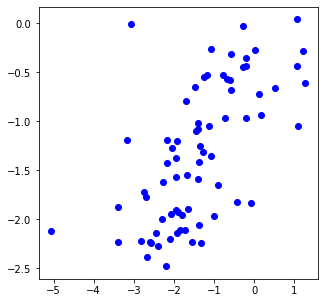

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(df3.NEE[P_TRAIN:], df3.predict[P_TRAIN:], 'bo')
